In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
n_step=1000
T=5

# simulation d'une trajectoire brownienne

On sait qu'un mouvement brownien $(B_u)_{u\geq 0}$ est un processus à acroissement indépendants qui vaut 0 en 0 et tel que
\begin{equation}\forall 0\leq s\leq t, \quad B_t-B_s\sim \mathcal{N}(0,t-s)\end{equation}

Evidement pour simuler des réalisations d'un mouvement brownien à un temps fixé il suffit de savoir simuler une variable aléatoire gaussienne puisqu'on sait que 
\begin{equation} \forall t\geq 0 \quad B_t\sim \mathcal{N}(0,t)\end{equation}

En revanche comment s'y prendre lorsque l'on souhaite simuler une trajectoire entière d'un mouvement brownien sur un intervalle $[0,T]$ pour un certain $T>0$ ?

On se doute bien que cela va être un problème beaucoup plus difficile puisqu'il s'agit maintenant de simuler et de stocker en mémoire une fonction continue (le coût en calcul et mémoriel va être beaucoup important). Par simplicité plutôt que de stocker la trajectoire en entière (une fonction continue donc), on va se contenter de stocker la réalisation de notre mouvement brownien aux instants $(t_i)_{0\leq i\leq n_{step} T} \quad t_i=i*\frac{1}{n_{step}}$. Si $n_{step}$ est suffisament grand, on stocke un nombre de points important de la trajectoire et cela nous donnera, du moins en première approximation, une idée de ce qu'il se passe. 

A noter que ce problème est beaucoup plus simple: Au prix d'une approximation, nous avons transformé le problème original qui consistait à simuler une variable aléatoire à valeur dans l'espace des fonction continue en un problème de simulation de $n_{step} T$ variables aléatoires à valeur réelle. 

Comment s'y prendre pour simuler les $(B_{t_i})_{0\leq i\leq n_{step} T}$ ?

Il est évident que pour tout i, $B_{t_i}$ est une variable aléatoire gaussienne. Cependant les variables aléaoires $B_{t_i},B_{t_j} \quad i\neq j$ ne sont pas indépendante les unes des autres.

En revanche puisque le mouvement brownien est une variable aléatoire à accroisement indépendant, il est classique que les $B_{t_{i+1}}-B_{t_i}$ sont indépendant les uns des autres et de loi $\mathcal{N}(0,\frac{1}{n_{step}})$

Pour simuler une réalisation de $(B_{t_i})_{0\leq i\leq n_{step} T}$ il suffit donc de simuler $n_{step} T$ variables aléatoires indépendant $(W_i)$ de loi $\mathcal{N}(0,\frac{1}{n_{step}})$ et de poser 
\begin{equation} \tilde{B}_{t_i}=\sum_{j=0}^i W_j\end{equation}

Ainsi le vecteur aléatoire $(\tilde{B}_{t_i})_i$ a bien la même loi que $(B_{t_i})_{i}$ (pourquoi est-ce un vecteur gaussien ?).
En ce sens la simulation est dite exacte.

In [68]:
#simulation de variable aléatoire gaussienne indépendantes de variance 1/n_step
gaussian_array=1/math.sqrt(n_step)*np.random.randn(T*n_step)
time=np.arange(0,5,1/n_step)+1/n_step
#on défini la réalisation de notre trajectoire brownienne en sommant nos gaussienne indépendantes 
brownian_motion=np.cumsum(gaussian_array)

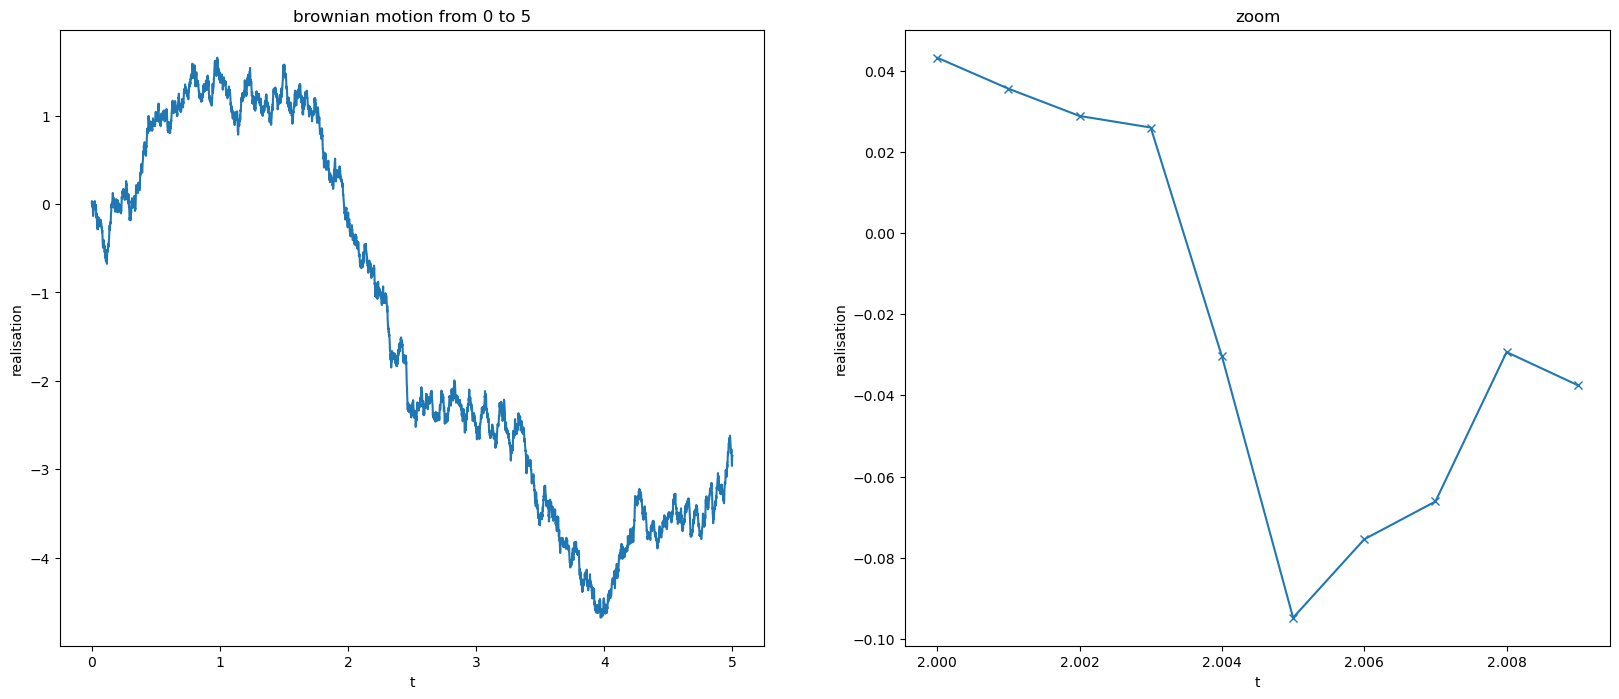

In [28]:
#affichage de la trajectoire
zoom_size=0.01
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.plot(time,brownian_motion,)
ax1.set_title('brownian motion from 0 to '+str(T))
ax1.set_xlabel("t")
ax1.set_ylabel("realisation")


ax2.set_title("zoom")
ax2.set_xlabel("t")
ax2.set_ylabel("realisation")
zoom_size=0.01
ax2.plot(time[2*n_step:round(2*n_step+zoom_size*n_step)],BM[2*n_step:round(2*n_step+zoom_size*n_step)],'x-')
plt.show()

Lorsque le nombre de pas est suffisamment important, dans sa globalité le graphe des $(t_i,B_{t_i})_i$ ressemble bien à une trajectoire brownienne. Evidemmment le caractère discret devient apparent lorsque l'on zoom suffisament (la fonction plot relie chaque points par des lignes droites). Lorsqu'on simule des trajectoires brownienne il est donc important de choisir un pas de simulation adapté à l'échelle du problème d'intérêt, de façon à ce que l'approximation discrète ne soit pas absurde. 

Il s'agit ici de la simulation d'une unique trajectoire, il n'y aucune raison que la simulation d'une autre trajectoire donne le même résultat. Ce n'est en général d'ailleurs pas le cas. 



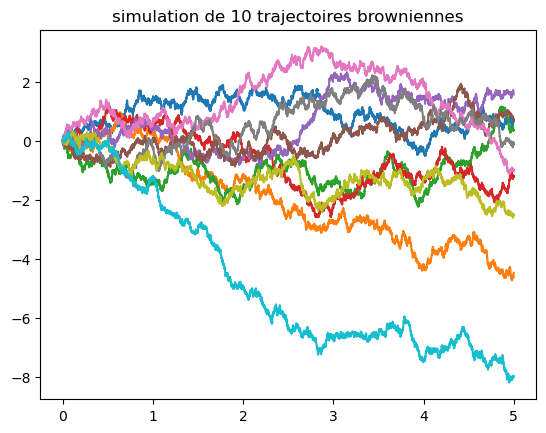

In [30]:
#nombre de trajectoires
n_trajectoire=10
time=np.arange(0,5,1/n_step)
for i in range(n_trajectoire):
    #simulation de variable aléatoire gaussienne indépendantes de variance 1/n_step
    gaussian_array=1/math.sqrt(n_step)*np.random.randn(T*n_step)
    #on défini la réalisation de notre trajectoire brownienne en sommant nos gaussienne indépendantes
    brownian_motion=np.cumsum(gaussian_array)
    plt.plot(time,brownian_motion)
plt.title("simulation de "+str(n_trajectoire)+" trajectoires browniennes")
plt.show()

# égalité trajectorielle contre égalité en loi

Nous avons vu la dernière fois que que pour tout $t\geq 0$, 

\begin{equation} \int_0^t (B_s)^2 ds\overset{\mathcal{L}}{=}t^2\int_0^1 (B_s)^2 ds\end{equation}

Rappelons que trajectoire par trajectoire le mouvement brownien une réalisation du mouvement brownien est une fonction continue sur $[0,t]$. On peut donc bien définir l'intégrale au sens de riemann le long de chaque trajectoire (et donc presque sûrement). En particulier $\int_0^t (B_s)^2 ds$ est fini presque sûrement (pourquoi ?) et est variable aléatoire dont tout les moments sont fini (cf fubini+jensen). 

Dans la suite, plutôt que de considérer directement des intégrales nous allons regarder les sommes de Riemann associés. On rappelle que pour une fonction f continue sur un intervalle $[0,t]$ on définit
\begin{equation} S_n=\frac{t}{n}\sum_{i=0}^n f(i*\frac{t}{n})\end{equation}
et que 
\begin{equation} \underset{n\to \infty}{\lim} S_n=\int_0^t f(s)ds\end{equation}

Cela justifie notre approximation des intégrales précédentes par les dites sommes de Riemann lorsque n est suffisant grand. 

## égalité en loi
pour observer l'égalité en loi entre ces deux processus nous allons observer la distribution de chacune des deux variables aléatoires (ou du moins de leur approximation avec des sommes de Riemann) pour un temps t fixé.

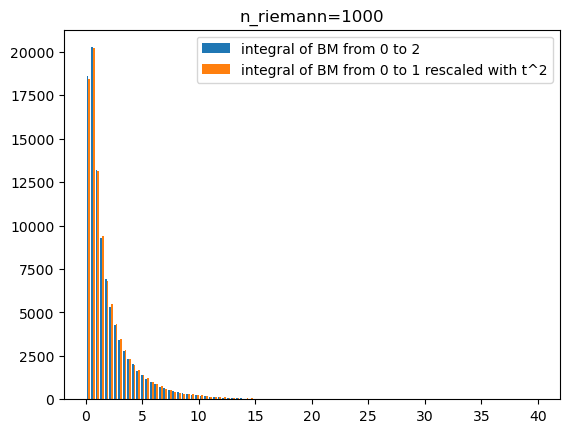

In [61]:
n_riemann=1000
VA_1=[]
VA_2=[]
for i in range(0,n_sim):
    BM=np.cumsum(1/math.sqrt(n_riemann)*np.random.randn(t*n_riemann))
    VA_1.append(t/(2*n_riemann)*np.sum(BM**2))
    VA_2.append(t**2/n_riemann*np.sum(BM[0:n_riemann]**2))

n_bins=100
plt.title("distribution")
plt.hist([VA_1,VA_2],bins=n_bins,label=['integral of BM from 0 to '+str(t),'integral of BM from 0 to 1 rescaled with t^2'])
plt.legend()
plt.show()

In [62]:
print(np.mean(VA_1),np.mean(VA_2))

2.00703265920744 2.0162851321241275


In [65]:
print(np.std(VA_1),np.std(VA_2))

2.3126976012590603 2.333687382260118


Formellement les variables aléatoires semblent avoir des distributions très similaires. Evidemment on s'attends à ce que les distibutions soient d'autant plus proche losqu'on augmente le nombre de réalisations simulés (pourquoi ?). Mais il y aussi un biais intraséque à la simulation du fait que les intégrales soient calculées pour des sommes de Riemann et ne sont donc pas exactes. (même si ce biais n'est pas aussi important qu'il pourrait n'y paraitre, en fait en choisissant bien le pas utilisé pour construire chacune des sommes de Riemann il est possible de les construires de façon à ce qu'elles aient même loi pour tout n).

## Non égalité trajectorielle

la non égalité trajectorielle des deux variables aléatoires est assez évidente. En effet $Y_t=t^2\int_0^1 (B_u)^2 du$ ne dépend du temps qu'au travers d'une fonction déterministe: il s'agit du produit d'une variable aléatoire $\int_0^1 (B_u)^2 du$, indépendante du temps par la fonction $t\to t^2$ (c'est donc une parabole donc le coefficient directeur est aléatoire). Tandis que $\int_0^t (B_u)^2 du$ est bien une variable aléatoire qui dépend de toute la trajectoire du mouvement brownien jusqu'à l'instant t. Chose intéressante le processus $(X_t)$ est d'ailleurs presque sûrement à valeur dans les fonctions de classe $C^{1+\alpha}$ pour tout $\alpha<\frac{1}{2}$. En effet on gagne formellement (et pas que en fait) un ordre de régularité par intégration. Trajectoire par Trajectoire, la variable aléatoire $X_t=\int_0^t (B_u)^2du$ est donc une fonction dérivable vérifiant:
\begin{equation}
\left\{
\begin{array}{l}
\frac{dX_s}{ds}=(B_s)^2\\
X_0=0\\
\end{array}
\right.
\end{equation}

In [80]:
brownian_motion=np.cumsum(1/math.sqrt(n_step)*np.random.randn(T*n_step))
Xt=1/n_step*np.cumsum(brownian_motion**2)
Yt=1/n_step*np.sum(brownian_motion[0:n_step]**2)*time**2

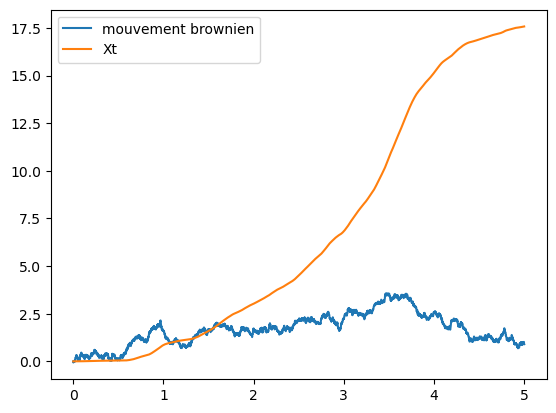

In [81]:
plt.plot(time,brownian_motion,label="mouvement brownien")
plt.plot(time,Xt,label='Xt')
plt.legend()
plt.show()

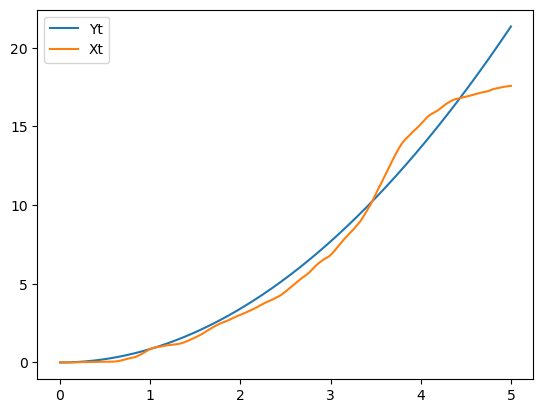

In [82]:

plt.plot(time,Yt,label="Yt")
plt.plot(time,Xt,label='Xt')
plt.legend()
plt.show()

Text(0, 0.5, 'realisation')

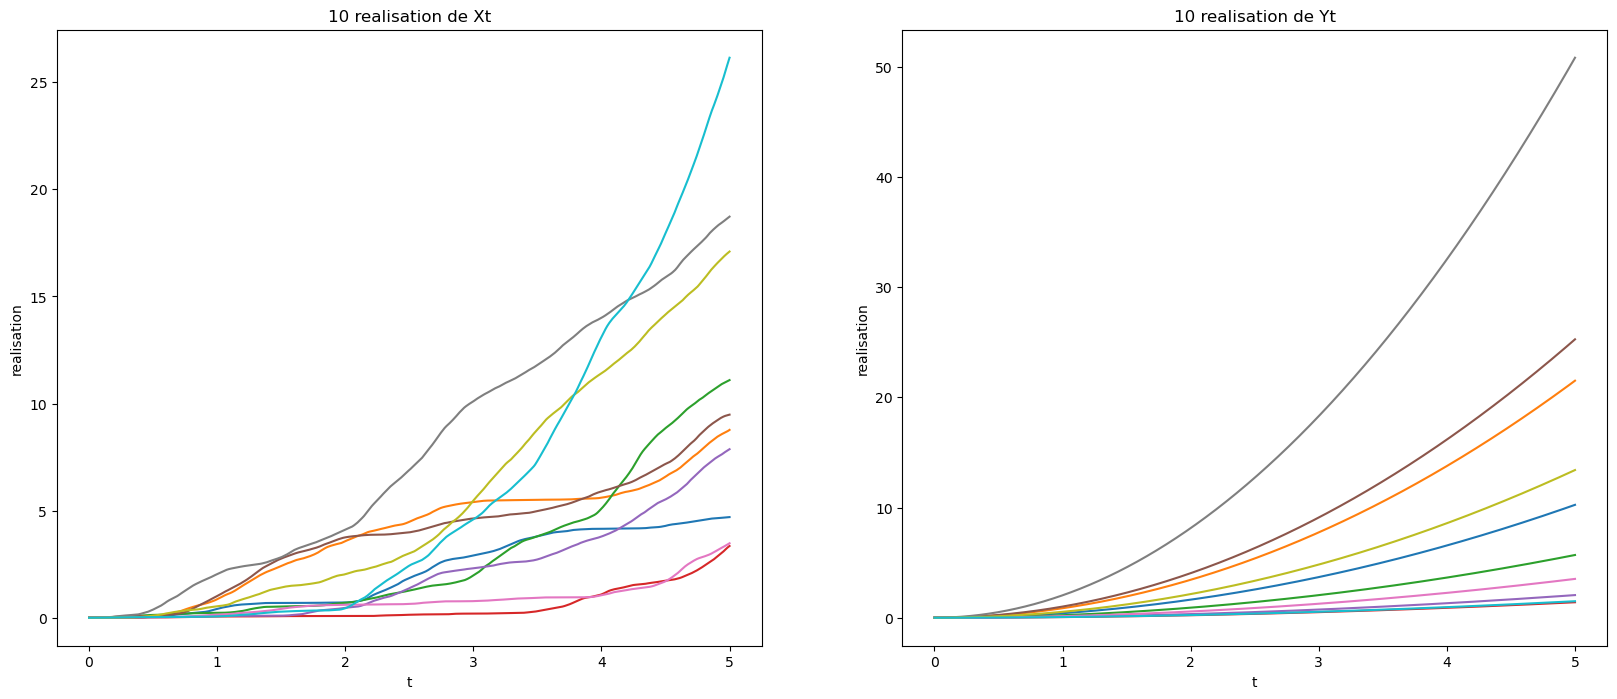

In [86]:
n=10
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
for i in range(0,n):
    brownian_motion=np.cumsum(1/math.sqrt(n_step)*np.random.randn(T*n_step))
    Xt=1/n_step*np.cumsum(brownian_motion**2)
    Yt=1/n_step*np.sum(brownian_motion[0:n_step]**2)*time**2
    ax1.plot(time,Xt)
    ax2.plot(time,Yt)
ax1.set_title(str(n)+' realisation de Xt')
ax1.set_xlabel("t")
ax1.set_ylabel("realisation")

ax2.set_title(str(n)+' realisation de Yt')
ax2.set_xlabel("t")
ax2.set_ylabel("realisation")

On peut regarder le résultat pour un plus grand nombre de réalisations pour se convaincre que les trajectoires des processus $(X_t)$ et $(Y_t)$ n'ont rien à voir. (le code couleur correspond à une même réalisation brownienne)

# Pour aller plus loin

Utiliser le code ci au dessus pour mettre en évidence quelques unes des propriétés du mouvement brownien. On pourra en particulier essayer d'interprêter la propriété de changement d'échelle, observer le principe de réflexion et jouer avec les temps d'atteinte du mouvement brownien sur un intervalle pour retrouver ce que vous avez vu en cours sur leur loi/espérance/probabilité. (si vous avez des questions n'hésitez pas à les formuler lors des sessions de tutorat)